<a href="https://colab.research.google.com/github/fofofizzz/AI-4032-course/blob/main/Hw1/Q2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Q2-PART I

#part A

#1)

خوانده میشود loadmat فرمت فایل دانلود شده به صورت متلب است که با دستور

In [12]:
!pip install --upgrade --no-cashe-dir gdown
!gdown 1-5IcKbUHSWls9e8l92zxPu7KFUPnsAMI


Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements file> [package-index-options] ...
  pip3 install [options] [-e] <vcs project url> ...
  pip3 install [options] [-e] <local project path> ...
  pip3 install [options] <archive url/path> ...

no such option: --no-cashe-dir
Downloading...
From (original): https://drive.google.com/uc?id=1-5IcKbUHSWls9e8l92zxPu7KFUPnsAMI
From (redirected): https://drive.google.com/uc?id=1-5IcKbUHSWls9e8l92zxPu7KFUPnsAMI&confirm=t&uuid=6b632326-6462-4429-aefc-227907c4bc49
To: /content/110.mat
100% 7.78M/7.78M [00:00<00:00, 83.5MB/s]


In [13]:
#file path: (/content/110.mat)

#2)

In [14]:
import numpy as np
import scipy.io
from scipy.io import loadmat

'''
scipyخب ما در این بخش از کد ابتدا کتاب خانه
را اضافه میکنیمloadmat و از آن
چون ما به دستور loadmat
را ایمپورت کردیمscipy احتیاج داریم از این رو
'''

data = loadmat('/content/110.mat')   # بارگذاری فایل مد نظر ما

print(data.keys())                                       # نمایش اطلاعات کلیدی
print("\nX110RPM =" ,data["X110RPM"])                    # نمایش اطلاعات مربوط به دور
print("\nX110_DE_time:" , "\nlen=" , len(data["X110_DE_time"]) , "\ndata:\n" , data["X110_DE_time"])
#DEنمایش اطلاعات مربوط به متغیر
print("\nX110_FE_time:" , "\nlen=" , len(data["X110_FE_time"]) , "\ndata:\n" , data["X110_FE_time"])
#FEنمایش اطلاعات مربوط به متغیر

dict_keys(['__header__', '__version__', '__globals__', 'X110_DE_time', 'X110_FE_time', 'X110RPM'])

X110RPM = [[1772]]

X110_DE_time: 
len= 486224 
data:
 [[ 0.03212677]
 [ 0.07823077]
 [ 0.16146831]
 ...
 [-0.08845292]
 [-0.02899754]
 [ 0.00855323]]

X110_FE_time: 
len= 486224 
data:
 [[0.08629091]
 [0.11053455]
 [0.11012364]
 ...
 [0.40145818]
 [0.46782   ]
 [0.52534727]]


در این فایل دو آرایه متشکل از تعداد زیادی فلوت موجود است که به نام های مشخص شده ذخیره شده اند و یک متغیر به نام دور بر دقیقه نیز موجود است که آرایه ای یک بعدی است

#3)

In [15]:
signal = data[ 'X110_DE_time' ]

#PART B

#1)

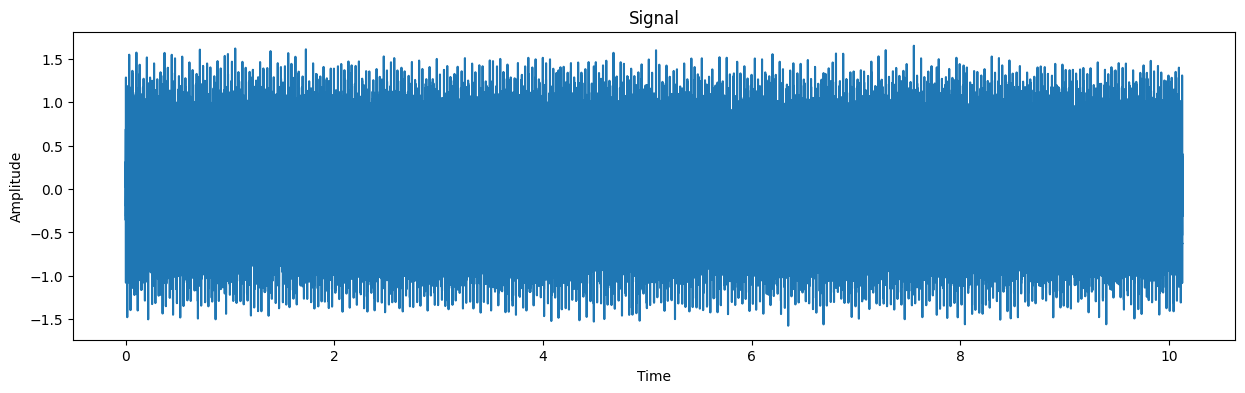

In [16]:
import matplotlib.pyplot as plt         #we use matplotlib.pyplot
fs=48000                                #declaring the frequence
time = np.arange(len(signal)) / fs      #declaring the time that it continue
plt.figure(figsize=(15, 4))             # ایجاد یک شکل با عرض 15  و ارتفاع 4 برای نمایش بهتر
plt.plot(time,signal)                   #making a plot
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Signal')
plt.show()

In [17]:
#چون فرکانس را ۴۸ هزار در نظر گرفتیم و ما ۴۸ هزار نمونه داریم
#تمام این نمونه 10 ثانیه خواهد شد

#2)

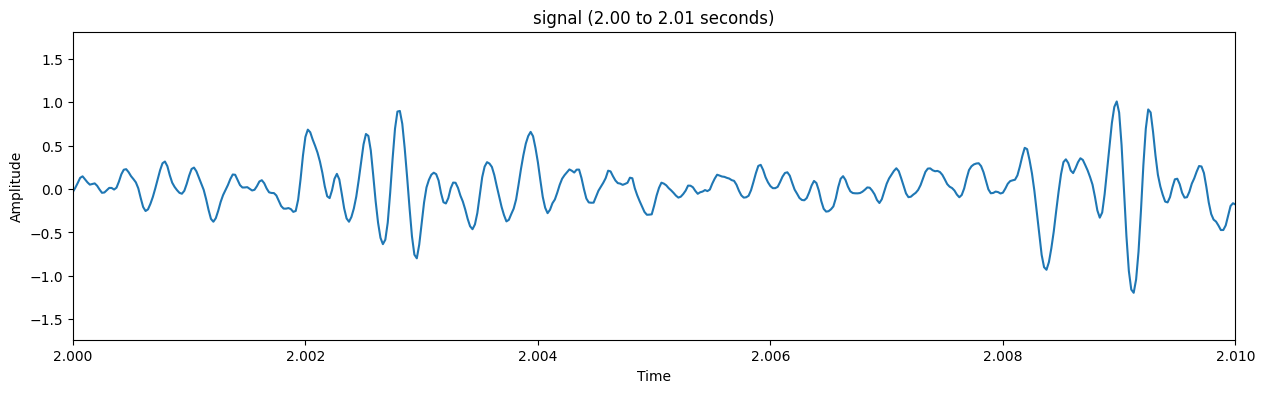

In [18]:
plt.figure(figsize=(15, 4))
plt.plot(time, signal)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('signal (2.00 to 2.01 seconds)')

plt.xlim(2.0, 2.01)

plt.show()

#PART G

#1)

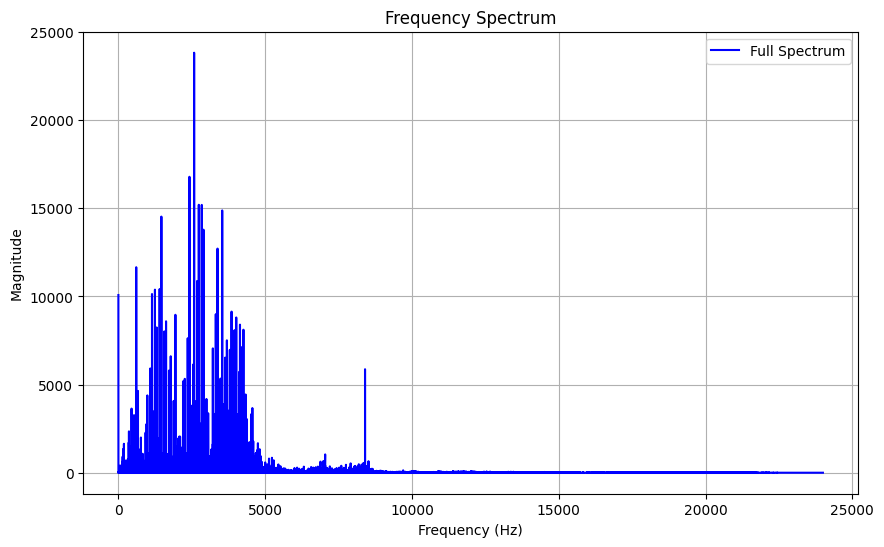

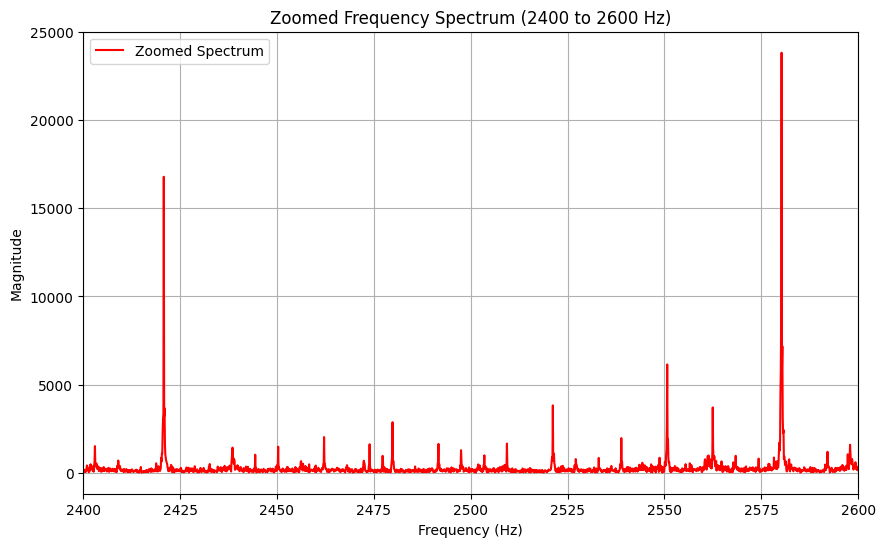

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat

def plot_frequency_spectrum(signal, sampling_rate):
    """
    This function takes a time-domain signal and its sampling rate,
    computes the frequency spectrum using FFT, and plots it.
    It also zooms into a specific frequency range (e.g., 2000 to 3000 Hz).
    """
    # Step 1: Compute the FFT of the signal
    fft_result = np.fft.fft(signal)

    # Step 2: Compute the corresponding frequencies
    n = len(signal)  # Number of samples
    frequencies = np.fft.fftfreq(n, d=1/sampling_rate)

    # Step 3: Compute the magnitude of the FFT result
    magnitude = np.abs(fft_result)

    # Step 4: Only consider the positive frequencies (first half of the spectrum)
    positive_frequencies = frequencies[:n//2]
    positive_magnitude = magnitude[:n//2]

    # Step 5: Plot the full frequency spectrum
    plt.figure(figsize=(10, 6))
    plt.plot(positive_frequencies, positive_magnitude, color='blue', label="Full Spectrum")
    plt.title("Frequency Spectrum")
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Magnitude")
    plt.grid()
    plt.legend()
    plt.show()  # Show the first plot

    # Step 6: Zoom into the frequency range of interest (2400 to 2600 Hz)
    plt.figure(figsize=(10, 6))
    plt.plot(positive_frequencies, positive_magnitude, color='red', label="Zoomed Spectrum")
    plt.title("Zoomed Frequency Spectrum (2400 to 2600 Hz)")
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Magnitude")
    plt.xlim(2400, 2600)  # Limit the x-axis to the range 2400-2600 Hz
    plt.grid()
    plt.legend()
    plt.show()  # Show the second plot

# Load the data from the .mat file
data = loadmat('/content/110.mat')

# Extract the signal
signal = data['X110_DE_time'].flatten()  # Flatten to convert to 1D array if needed

# Define the sampling rate
sampling_rate = 48000  # Sampling rate is 48 kHz

# Call the function to plot the frequency spectrum
plot_frequency_spectrum(signal, sampling_rate)

In [20]:
# در این نمودار، فرکانس‌هایی که بالاترین دامنه را دارند، پیک‌های اصلی را ایجاد می‌کنند.
#از این نمودار، واضح است که فرکانس غالب تقریباً در محدوده بین 2000 تا 5000 هرتز قرار دارد، با یک پیک مشخص که در حدود 4000 هرتز دیده می‌شود.
#این می‌تواند به شما کمک کند که بفهمید که چه فرکانس‌هایی بیشتر در سیگنال برجسته هستند.



#Bookmark message
#Copy message




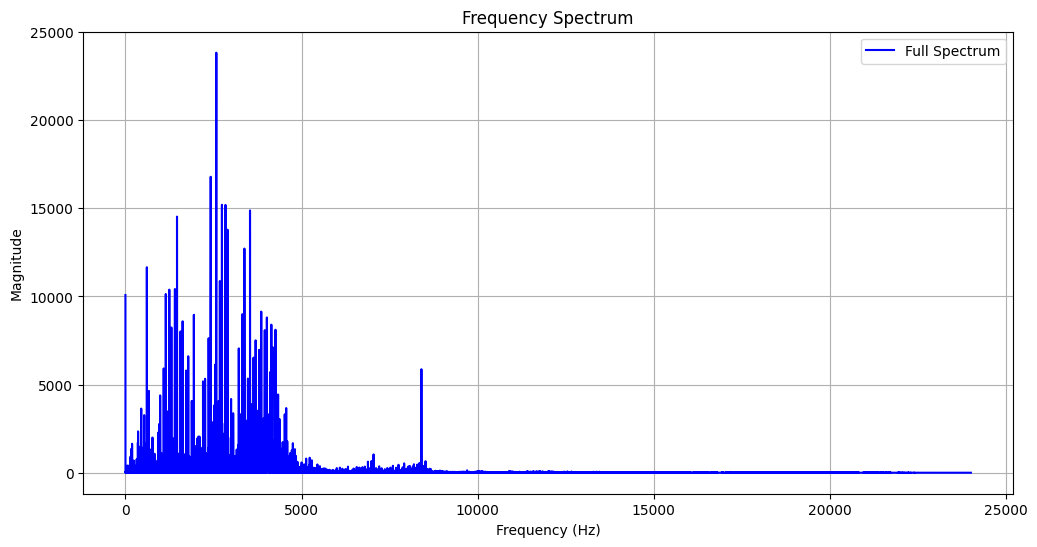

Dominant Frequency: 2580.242851031623 Hz


In [21]:
import numpy as np
import matplotlib.pyplot as plt

# بارگذاری داده‌های صوتی
# فرض کنید داده‌های شما در یک آرایه numpy به نام 'data' و فرکانس نمونه‌برداری 'fs' است

# محاسبه فوریه:
spectrum = np.fft.fft(signal)
frequencies = np.fft.fftfreq(len(spectrum), 1/fs)
magnitude = np.abs(spectrum)

# پیدا کردن فرکانس غالب
peak_index = np.argmax(magnitude[:len(magnitude)//2])  # فقط نیمی از طیف را در نظر می‌گیریم
dominant_frequency = frequencies[peak_index]

# رسم طیف فرکانسی
plt.figure(figsize=(12, 6))
plt.plot(frequencies[:len(frequencies)//2], magnitude[:len(magnitude)//2], color='blue', label='Full Spectrum')
plt.title('Frequency Spectrum')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid()
plt.legend()
plt.show()

# نمایش فرکانس غالب
print(f'Dominant Frequency: {dominant_frequency} Hz')

#PART D

#1)

In [22]:
# تبدیل سیگنال به یک آرایه یک بعدی
signal = signal.flatten()

# اندازه هر قطعه (frame size)
frame_size = 128

# مقدار همپوشانی (hop length) - دلخواه
hop_length = 64  # 50% همپوشانی

# تعداد نمونه‌ها در سیگنال
num_samples = len(signal)

# محاسبه تعداد قطعات
num_frames = 1 + (num_samples - frame_size) // hop_length

# ایجاد آرایه خالی برای ذخیره قطعات
frames = np.zeros((num_frames, frame_size))

# برش سیگنال به قطعات
for i in range(num_frames):
    start = i * hop_length
    end = start + frame_size
    frames[i, :] = signal[start:end]

# چاپ ابعاد آرایه قطعات
print(f"Shape of frames array: {frames.shape}")

Shape of frames array: (7596, 128)


#PART H

#1)

In [23]:
import pandas as pd
# فرض کنید 'frames' حاوی قطعات سیگنال است (خروجی قسمت قبل)
# frames.shape = (7596, 128)

# تبده‌سازی آرایه NumPy به pandas.DataFrame
df_frames = pd.DataFrame(frames)

# نمایش اولین چند سطر DataFrame
print(df_frames.head())

# ذخیره DataFrame در یک فایل CSV (اختیونی)
df_frames.to_csv('signal_frames.csv', index=False)

        0         1         2         3         4         5         6    \
0  0.032127  0.078231  0.161468  0.250547  0.315426  0.311463  0.233023   
1 -0.172316 -0.364660 -0.505266 -0.559715 -0.546155 -0.470845 -0.298320   
2  0.023991 -0.009596 -0.026286 -0.041097 -0.068426 -0.090956 -0.092834   
3 -0.015229 -0.029623 -0.100135 -0.193386 -0.265567 -0.271617 -0.223218   
4 -0.042349 -0.031710 -0.010222  0.050902  0.120162  0.192135  0.152081   

        7         8         9    ...       118       119       120       121  \
0  0.115782 -0.011265 -0.112861  ... -0.306456 -0.225722 -0.076979  0.102847   
1 -0.068217  0.258892  0.624386  ...  0.031710 -0.026703 -0.082612 -0.126838   
2 -0.073015 -0.029623  0.039428  ...  0.071764  0.099092  0.150412  0.161260   
3 -0.149577 -0.068843  0.028998  ...  0.013769  0.020444  0.008345 -0.026077   
4  0.093251  0.025868 -0.073224  ...  0.042766  0.132262  0.161468  0.076979   

        122       123       124       125       126       127  
0  0

#2)

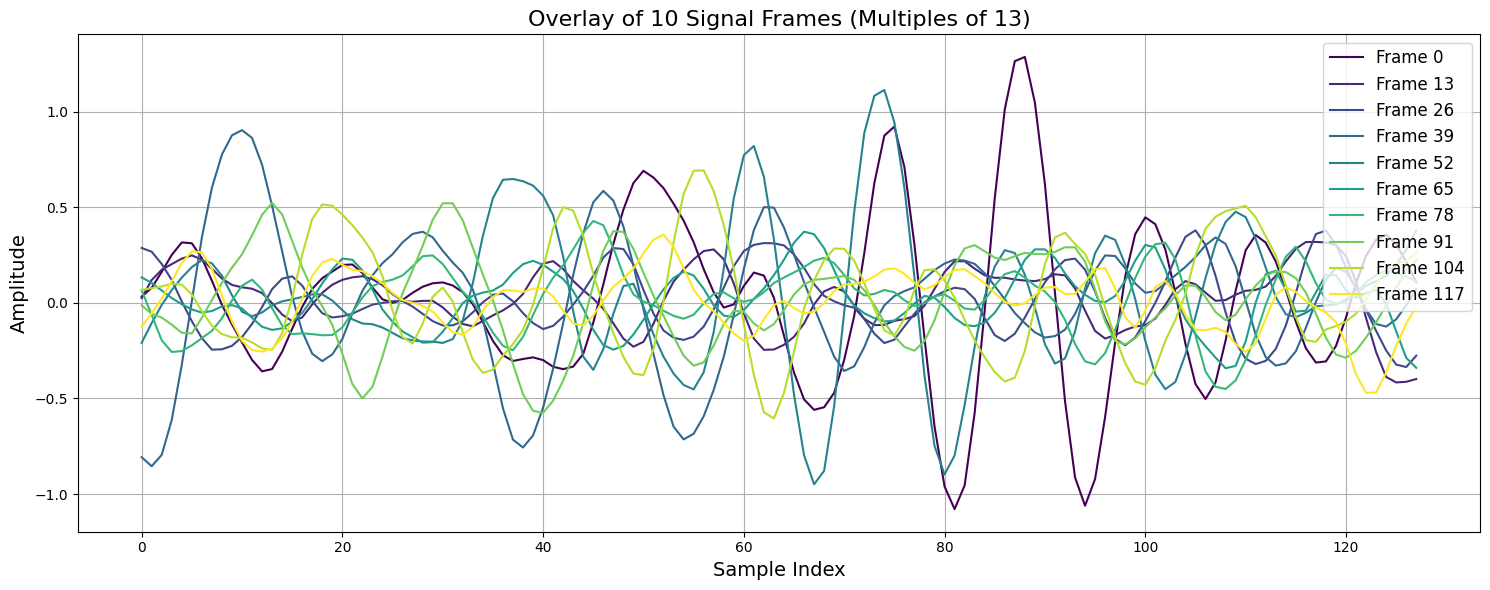

In [24]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# فرض کنید 'df_frames' حاوی قطعات سیگنال است (خروجی قسمت قبل)
# df_frames.shape = (7596, 128)

# تعداد قطعات مضرب 13 که می‌خواهیم نمایش دهیم
num_multiples = 10

# انتخاب قطعات مضرب 13
selected_indices = [i for i in range(len(df_frames)) if i % 13 == 0][:num_multiples]
selected_frames = df_frames.iloc[selected_indices]

# تعریف لیستی از رنگ‌ها برای هر قطعه
colors = plt.cm.viridis(np.linspace(0, 1, num_multiples))

# رسم نمودار
plt.figure(figsize=(15, 6))
for i, index in enumerate(selected_indices):
    plt.plot(selected_frames.loc[index], label=f'Frame {index}', color=colors[i])

# تنظیمات نمودار
plt.title('Overlay of 10 Signal Frames (Multiples of 13)', fontsize=16)
plt.xlabel('Sample Index', fontsize=14)
plt.ylabel('Amplitude', fontsize=14)
plt.grid(True)
plt.legend(loc='upper right', fontsize=12)
plt.tight_layout()

# نمایش نمودار
plt.show()

#PART V

#1)

In [25]:
import numpy as np

def calculate_signal_features(signal):
    """
    این تابع یک سیگنال را به عنوان ورودی دریافت می‌کند و مقادیر میانگین،
    انحراف معیار، و ریشه میانگین مربعات (RMS) را محاسبه و بازگرداند.

    ورودی:
        signal (numpy array): سیگنال ورودی

    خروجی:
        mean_value (float): میانگین سیگنال
        std_value (float): انحراف معیار سیگنال
        rms_value (float): ریشه میانگین مربعات سیگنال
    """
    # محاسبه میانگین
    mean_value = np.mean(signal)

    # محاسبه انحراف معیار
    std_value = np.std(signal)

    # محاسبه ریشه میانگین مربعات (RMS)
    rms_value = np.sqrt(np.mean(np.square(signal)))

    return mean_value, std_value, rms_value

#2)

In [27]:
import numpy as np
import pandas as pd

# تابع calculate_signal_features که قبلاً پیاده‌سازی شده است
def calculate_signal_features(signal):
    mean_value = np.mean(signal)
    std_value = np.std(signal)
    rms_value = np.sqrt(np.mean(np.square(signal)))
    return mean_value, std_value, rms_value

# تعریف یک سیگنال نمونه (فرض کنید این سیگنال شامل چندین نمونه است)
# فرض کنید هر نمونه دارای طول ثابت 128 است
signal = np.random.randn(7596, 128)  # 7596 نمونه، هر کدام با طول 128

# لیستی برای ذخیره ویژگی‌ها
features_list = []

# محاسبه ویژگی‌ها برای هر نمونه
for i in range(signal.shape[0]):  # تعداد نمونه‌ها
    sample = signal[i]  # انتخاب نمونه iام
    mean, std, rms = calculate_signal_features(sample)  # محاسبه ویژگی‌ها
    features_list.append([mean, std, rms])  # ذخیره ویژگی‌ها

# تبدیل لیست ویژگی‌ها به DataFrame
columns = ['Mean', 'Standard Deviation', 'RMS']  # نام ستون‌ها
df_features = pd.DataFrame(features_list, columns=columns)

# نمایش اولین چند سطر DataFrame
print(df_features.head())

       Mean  Standard Deviation       RMS
0  0.101989            0.987019  0.992275
1 -0.007497            0.939377  0.939407
2  0.026652            1.007933  1.008286
3 -0.015058            1.041863  1.041972
4  0.003648            0.958735  0.958742


#3)

In [29]:
# فرض کنید df_features DataFrame حاوی ویژگی‌های محاسبه‌شده است

# ذخیره DataFrame در فایل CSV بدون index
df_features.to_csv('signal_features.csv', index=False)

print("DataFrame با موفقیت در فایل signal_features.csv ذخیره شد.")

DataFrame با موفقیت در فایل signal_features.csv ذخیره شد.
